#### Name: 

# PHYS 230 Lab Assignment 4

### Monday, February 2, 2026: Chapter 3.1-3.2
- Graphing in python - Matplotlib PyPlot
- Scatter plots

#### Start by importing any packages you need below (feel free to update as you go):

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Catch the errors! (20 pts - 5 pts each)

**Please read directions carefully**

For each of the following cells, find the error (or errors), and correct it (or them) by:<br> 
    a. edit the problem cell with the corrected code so it will run [do not add a new cell] <br>
    b. below the cell, add a new markdown cell that describes what was wrong with the code<br>
<br>
**Make sure to write in complete sentences; corrected code with a poorly written explanation will not receive better than 4 of 5 points on a given question.** I am not looking for a lengthy explanation; but one that is sufficiently detailed to explain the errors. 

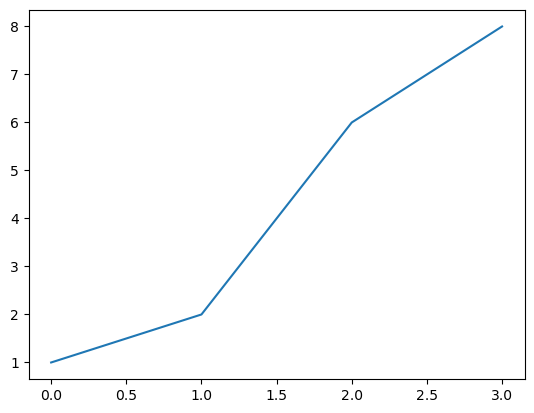

In [4]:
#1 - create a list and plot it
x=[1,2,6,8]
plt.plot(x)

I imported matplotlib.pyplot as plt above, so changed plot() to plt.plot()

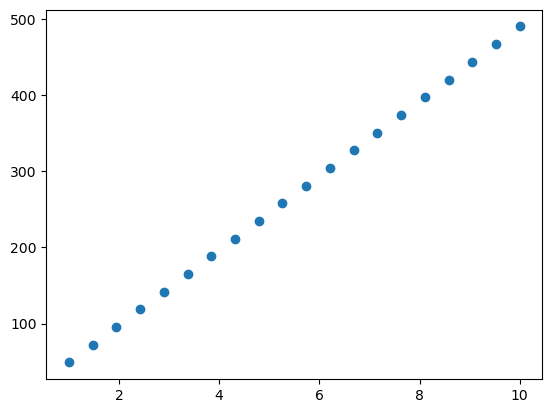

In [19]:
#2 
# instructions: make a plot of potential energy (E) of a 5 kg object given a range of heights (h) using circle markers
h = np.linspace(1,10,20)
m = 5 #kg
g = 9.8 #m/s^2
E = m*g*h
plt.plot(h,E,"o")

m and g were not defined and there was no multiplication sign between them. In addition, arange(1,10,20) only includes one number, 1, since it is counting by 20s and the next number would be 21, which is greater than 10. I changed arange to linspace.

Text(0, 0.5, 'sin(theta)')

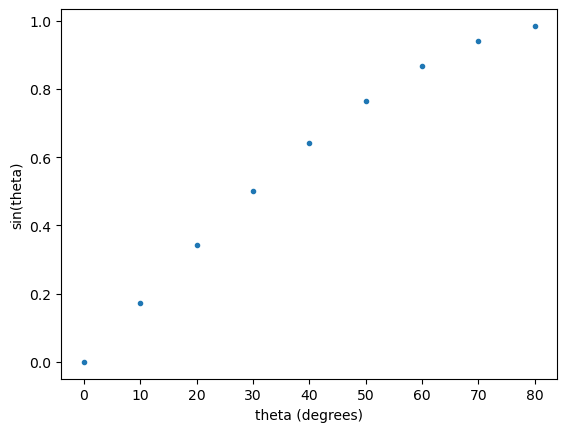

In [35]:
#3 plotting a graph of sin(theta) vs. theta with axis labels
theta = np.arange(0,90,10)
theta = np.radians(theta)
y = np.sin(theta)
plt.plot(np.degrees(theta),y, ".")
plt.xlabel('theta (degrees)')
plt.ylabel('sin(theta)')

"points" is not a valid input of plt.plot(). To make the markers be points, I used ".". Also, to make labels, I used xlabel and ylabel, not xaxis and yaxis. Finally, it seems that since the label is in degrees, the person wants to use degrees. However, np.sin() takes radians. So I first convert theta into radians, and then back to degrees to make the label make sense.

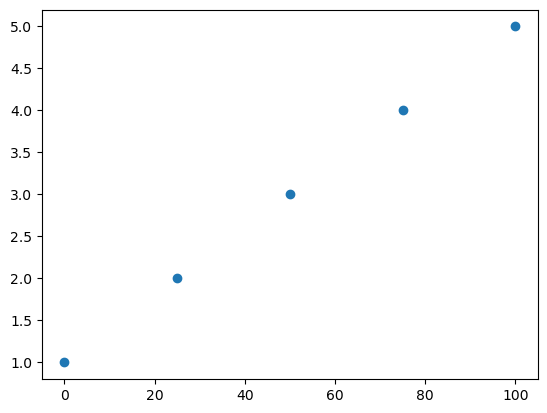

In [29]:
#4 - making a scatter plot of the array a and list b
a = np.linspace(0,100,5)
b = [1,2,3,4,5]
plt.scatter(a,b)

First of all, it should be np.linspace, not np,linspace. Second, the x data used and y data used are different lengths. I changed the x data to contain 5 points by making the last value in linspace 5.

## Short python snippets (10 pts - 5 pts each)
Below each markdow cell, write a short python snippet to perform the indicated action; you will likely have to use google to find out how to perform some of these actions--this is deliberate on my part. Google and *stack overflow* are your friends.<br>
Add a markdown cell to explain your thinking if this is needed.

1. Create a list of 10 random integers between 0 and 20 and plot them. (You should look up how to make it random!)

[20, 7, 18, 15, 2, 2, 7, 18, 4, 2]


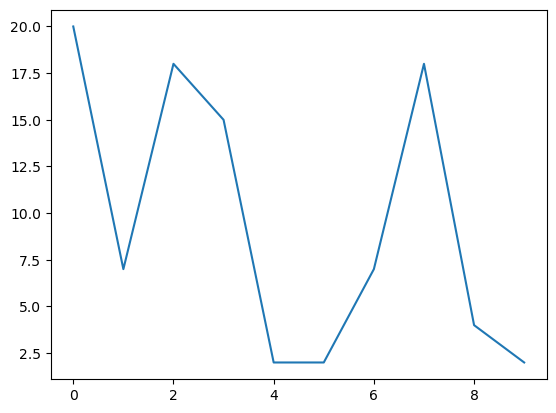

In [40]:
random_nums = [random.randint(0,20) for _ in range(10)] #list comprehension that creates a list of 10 random numbers between 0 and 20 (duplicates allowed)
print(random_nums)
plt.plot(random_nums)

2. Make a scatter plot of two random independent arrays with 50 floating point values. Make all points larger & magenta. 

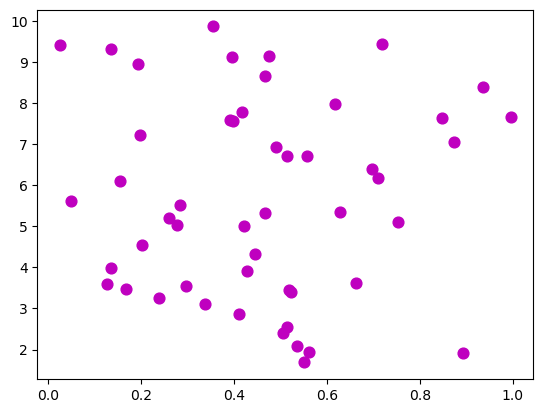

In [46]:
random_floats1 = [random.random() for _ in range(50)] #random.random creates floats between 0 and 1 instead of ints
random_floats2 = [random.uniform(1,10) for _ in range(50)] #creates random floats betwween 1 and 10
plt.scatter(random_floats1, random_floats2, c = 'm', s=60) #plots two arrays versus each other with big magenta points

### Write a script 1 (27 pts)
#### Plotting a wave

Write a code to do the following: 
- Create an array "t" that consists of float points between 0 and 20. 
    - Make sure to use enough points so that the graph looks smooth
- Assuming this is wave data following the equation $y(t) = A\sin(\omega t)$, calculate $y$ using $\omega = 0.5$. 
    - Ask the user for the value of $A$. 
- Make a plot of $y$ vs $t$, making all points cyan diamond markers 
- Add a second set of data to your plot using cosine instead
    - You choose the color and marker style (must be different from sine)
- Don't forget to add a title and label your axes

When your program is complete, add a markdown cell below it to explain your process and program. 

Input value of A 3


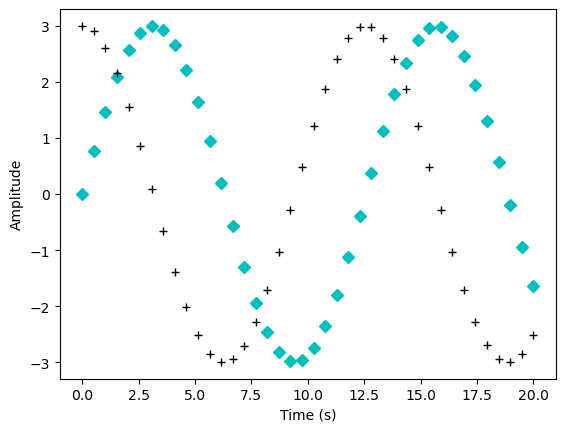

In [49]:
t = np.linspace(0,20,40) #array of times
A = float(input("Input value of A")) #asks for user input and converts it to a float
y = A*np.sin(0.5*t)
plt.plot(t,y,"cD")
z = A*np.cos(0.5*t)
plt.plot(t,z,"k+")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

I first created an array of 40 points between 0 and 20 using linspace. I then asked the user for the value of A and converted it to a float. I calculated and plotted y with the correct markers. I then calculated and plotted z (using cosine instead of sine). I labeled the axes and then used plt.show() to make sure everything showed up.

### Write a script 2 (22 pts)
#### Importing data for a scatter plot 

Write a code to do the following: 
- Download the file "circuit.txt" from Moodle
    - The first column is of voltage, the second column is of current, and the third column is the uncertainty in the voltage
- Make a scatter plot of the data so that if you knew how to do a linear fit to the data the slope would be resistance. 
- Label the axes with units and title the graph "Voltage and current in a resistor" 
- Add error bars to the plot for the uncertainty in the voltage 

When your program is complete, add a markdown cell below it to explain your process and program. 

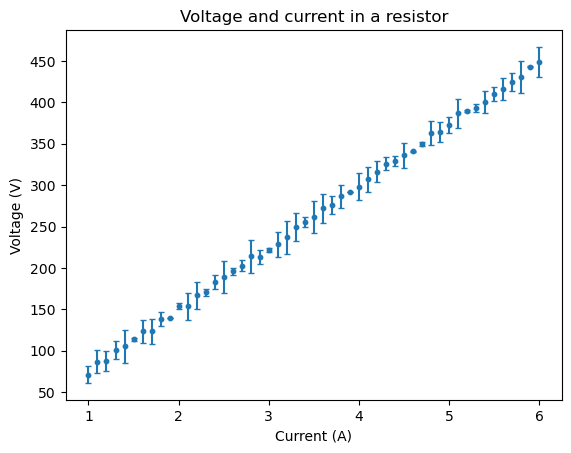

In [63]:
data = np.loadtxt("circuit.txt",float)
voltage = data[:,0]
current = data[:,1]
voltage_unc = [random.uniform(0,20) for _ in range(len(voltage))] #creates an array of random values between 0 and 20 of the same length
plt.scatter(current, voltage,s=10)
plt.errorbar(current, voltage, yerr = voltage_unc,fmt="None", capsize=2) #error bars of uncertainty
plt.xlabel("Current (A)")
plt.ylabel("Voltage (V)")
plt.title("Voltage and current in a resistor")
plt.show()

I created the voltage array from the first column of circuit.txt and the current array from the second column. Voltage uncertainty is a list of random values between 0 and 20 with the same amount of values as voltage. I plotted voltage vs current so the slope would be resistance. I then added error bars, labels, and a title.

### Write a script 3 (22 pts)
#### Creating a plot with axes labels and units! 

Make an interactive plot of 
$$ x = 3e^{(\frac{\pi t^{3/2}}{8})}$$
from 
$$t=0 \;\;\mathrm{to}\;\; t=5\;\mathrm{sec}$$
where $x$ is measured in meters. Once again, google is your friend, and the Matplotlib site has many examples.Make sure that you have a sufficient number of points in your $t$ array so that the plot looks smooth; i.e. 20 points is far to few points!
Make sure that you include axes labels with units.

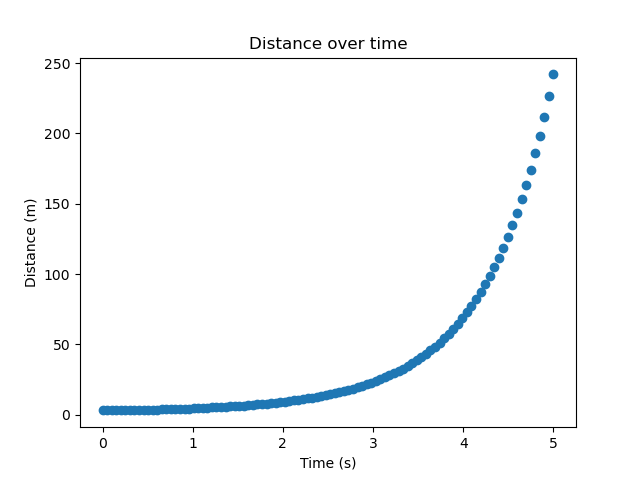

In [2]:
#interactive plot
%matplotlib ipympl  

t = np.linspace(0,5,100) #seconds
x = 3*(math.e**(math.pi*(t**(3/2))/8)) #meters
plt.scatter(t,x)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Distance over time")
plt.show()

I created an interactive plot with ipympl. I used 100 points between 0 and 5 to assure smoothness, calculated x, and then plotted x vs t.